# Fall 2025 - Assignment 1

Electronic submission on ZoneCours no later than **October 17 at 11:55 PM** of:

* This Jupyter notebook (.ipynb) as the report, after adding your answers.
* All .py files necessary to run the notebook

The report must:

* be in .ipynb format (points will be deducted for any other format).
* include the student ID number of all team members in the first cell (i.e., replace these instructions).
* answer the questions and discuss the results using tables, figures, and Markdown cells.

Grading rubric:

* **40%** Accuracy of results
* **25%** Complete and concise discussions (Markdown cells)
* **20%** Conciseness of the notebook (.ipynb with minimal code) and clarity of figures
* **15%** Code clarity (.py)

# Context

We are going to consider the most liquid options traded on Apple on two particular business days of 2020: January 17 and March 20. The next couple of code cells were used to generate the dataset by connecting to OptionMetrics. With `GENERATE = False`, they simply load the dataset as saved to disk.

In [2]:
# The following import allow absolute imports scripts within the dorion_francois package
#import internal_script 

import datetime as dt
import os
import sys
import numpy as np
import pandas as pd
import pickle
import importlib

In [4]:
def filters(options):
    """These filters were applied to the data"""
    # Options before maturity
    options = options.loc[options.date < options.exdate].reset_index()

    # Positive open interest
    options = options[options['open_interest'] > 0] 

    # Abs(delta) between 0.01 and 0.99
    options = options[(options['delta'].abs() >= 0.01) & (options['delta'].abs() <= 0.99)] 

    # Implied vol between 0.03 and 2
    options = options[(options['impl_volatility'] >= 0.03) & (options['impl_volatility'] <= 2)] 

    # Bid price is greater than 0.1 and less than ask price
    options = options[(options['best_offer'] > options['best_bid']) & (options['best_bid'] > 0.1)] 
    
    return options

GENERATE = False
if GENERATE:
    import dorion_francois.option_metrics as om    
    jan17 = om.get_option_data(101594, dt.date(2020,1,17))
    mar20 = om.get_option_data(101594, dt.date(2020,3,20))
    options = filters( pd.concat((jan17,mar20),axis=0) )
    with open('202510-assignment1.pkl','wb') as fh:
        # OptionMetrics 'strike_price' column is the strike x1000. We'll drop it to avoid confusion; use the 'strike' column
        pickle.dump(options.drop(columns=['strike_price']),fh)
else:
    with open('202510-assignment1.pkl','rb') as fh:
        options = pickle.load(fh)
options.describe()

,index,secid,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,...,option_price,DTM,YTM,risk_free,stock_price,stock_exdiv,implied_forward_price,implied_vol_bms,implied_vol_bid,implied_vol_ask
count,3041.000000,3041.0,3041.0,3041.0,3041.0,3041.0,3041.000000,3041.0,3041.0,3041.0,...,3041.0,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3039.000000,2907.000000,3041.000000
mean,1290.575469,101594.0,39.54265,41.070812,302.719171,1493.480434,0.486984,0.051175,0.004216,43.996647,...,40.306731,247.602105,0.678362,0.011057,267.849300,266.408353,268.266957,0.491364,0.463369,0.517211
std,588.418749,0.0,47.505847,48.379765,1413.149222,2810.188475,0.246677,0.573104,0.00421,39.878651,...,47.939597,256.838994,0.703668,0.005106,44.329611,44.126488,45.364910,0.240483,0.227888,0.264064
min,166.000000,101594.0,0.11,0.14,0.0,1.0,0.209335,-0.989916,0.00004,0.264909,...,0.13,7.000000,0.019178,0.004597,229.240000,226.093746,227.456884,0.209760,0.004413,0.211192
25%,805.000000,101594.0,3.85,4.75,0.0,76.0,0.308580,-0.332122,0.001665,13.6014,...,4.25,35.000000,0.095890,0.006167,229.240000,227.603325,228.595023,0.313801,0.290405,0.324194
50%,1334.000000,101594.0,20.05,21.5,14.0,383.0,0.407585,0.02422,0.003027,29.80537,...,20.8,154.000000,0.421918,0.008564,229.240000,229.240000,229.774853,0.414581,0.389198,0.437239
75%,1800.000000,101594.0,60.75,63.0,97.0,1594.0,0.593389,0.526664,0.005168,64.20898,...,61.75,455.000000,1.246575,0.016588,318.730000,317.145554,319.221626,0.603811,0.573138,0.637671
max,2345.000000,101594.0,271.0,275.5,29443.0,28015.0,1.998797,0.989859,0.042843,193.543,...,273.25,882.000000,2.416438,0.017424,318.730000,318.730000,325.069560,1.656574,1.601841,2.527934


# Question 1

Create a scatter plot with the risk-free rate (`100*options.risk_free`) against the time to maturity expressed in years (`options.YTM`). Discuss the figure. Given that the Black-Merton-Scholes economy assumes that the risk-free rate is constant, should one still account for the variation it illustrates if pricing options with the model? Why?

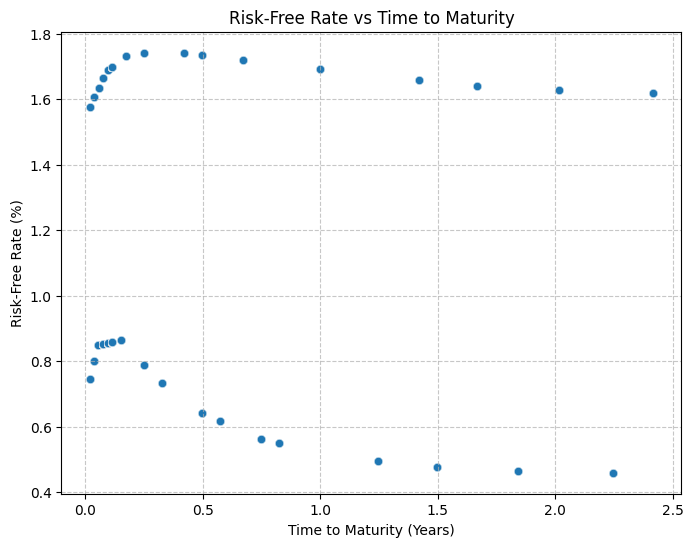

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=options['YTM'], 
    y=100 * options['risk_free'], 
    alpha=0.5
)

plt.xlabel("Time to Maturity (Years)")
plt.ylabel("Risk-Free Rate (%)")
plt.title("Risk-Free Rate vs Time to Maturity")

plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

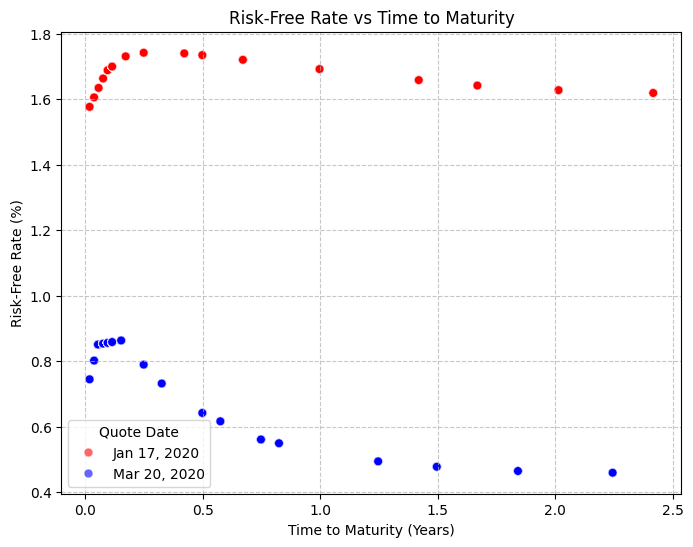

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a quote_date label
df = options.copy()
df['quote_date'] = df['date'].apply(
    lambda d: "Jan 17, 2020" if str(d).startswith("2020-01-17") else "Mar 20, 2020"
)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="YTM",
    y=100 * df['risk_free'],
    hue="quote_date",                # color by date
    palette={"Jan 17, 2020": "red", "Mar 20, 2020": "blue"},
    alpha=0.6,
    s=40
)

plt.xlabel("Time to Maturity (Years)")
plt.ylabel("Risk-Free Rate (%)")
plt.title("Risk-Free Rate vs Time to Maturity")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Quote Date")
plt.show()

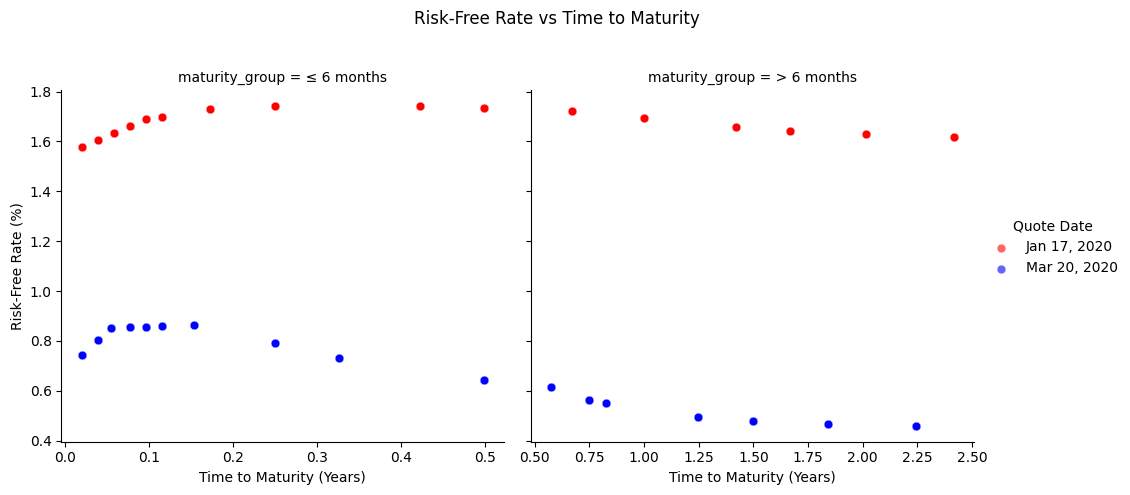

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = options[['YTM','risk_free','date']].dropna().copy()

df['date_norm']  = pd.to_datetime(df['date']).dt.tz_localize(None).dt.normalize()
labels = {pd.Timestamp('2020-01-17'): 'Jan 17, 2020',
          pd.Timestamp('2020-03-20'): 'Mar 20, 2020'}
df['quote_date'] = df['date_norm'].map(labels)

df = df[df['quote_date'].notna()].copy()

df['maturity_group'] = np.where(df['YTM'] <= 6/12, '≤ 6 months', '> 6 months')
df['risk_free_pct']  = 100 * df['risk_free']

palette = {'Jan 17, 2020': 'red', 'Mar 20, 2020': 'blue'}

g = sns.FacetGrid(df, col="maturity_group", height=5, sharex=False, sharey=True,
                  hue="quote_date", palette=palette)
g.map_dataframe(sns.scatterplot, x="YTM", y="risk_free_pct", alpha=0.6, s=40)
g.set_axis_labels("Time to Maturity (Years)", "Risk-Free Rate (%)")
g.add_legend(title="Quote Date")
g.fig.subplots_adjust(top=0.82)
g.fig.suptitle("Risk-Free Rate vs Time to Maturity")
plt.show()



# Question 2
Similarly, scatter `options.stock - options.stock_exdiv`, where the former is the stock price and the latter accounts for the dividends **actually** paid over the life of the options.

Discuss the figure. Can we conclude that Apple changed its dividend policy between the two dates? Describe which variation of the Black-Merton-Scholes formula seen in class could be used to price the options on Apple if they were European options. Support your discussion with succinct mathematical expressions and/or derivations, in which you can focus on the calls without loss of generality.

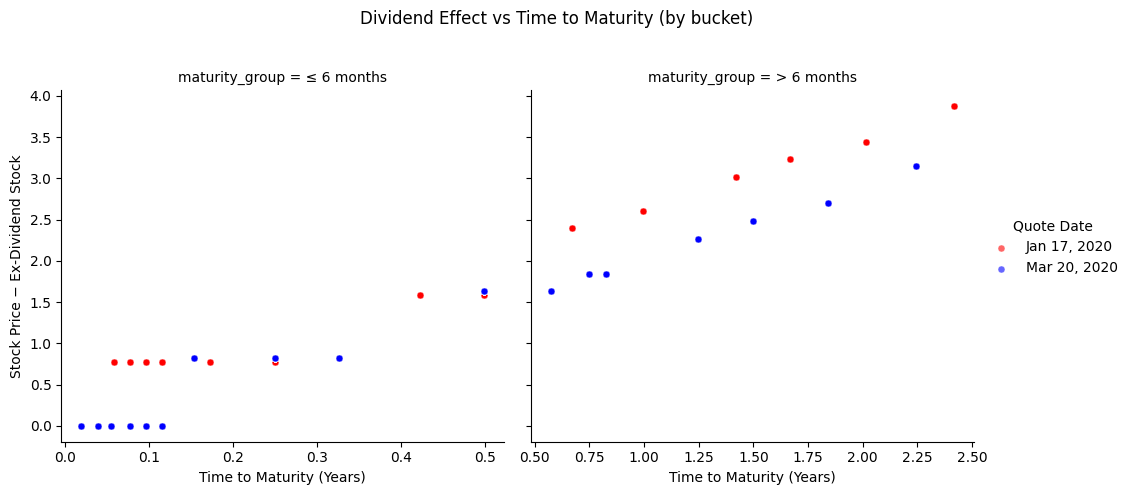

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = options[['YTM', 'stock_price', 'stock_exdiv', 'date']].dropna().copy()
df = df.assign(div_eff = df['stock_price'] - df['stock_exdiv'])

df['date_norm'] = pd.to_datetime(df['date']).dt.tz_localize(None).dt.normalize()

labels = {
    pd.Timestamp('2020-01-17'): 'Jan 17, 2020',
    pd.Timestamp('2020-03-20'): 'Mar 20, 2020'
}
df['quote_date'] = df['date_norm'].map(labels)


df = df[df['quote_date'].notna()]

df['maturity_group'] = np.where(df['YTM'] <= 6/12, '≤ 6 months', '> 6 months')

palette = {'Jan 17, 2020': 'red', 'Mar 20, 2020': 'blue'}
g = sns.FacetGrid(df, col='maturity_group', height=5, sharex=False, sharey=True,
                  hue='quote_date', palette=palette)
g.map_dataframe(sns.scatterplot, x='YTM', y='div_eff', alpha=0.6, s=25)

g.set_axis_labels('Time to Maturity (Years)', 'Stock Price − Ex-Dividend Stock')
g.add_legend(title='Quote Date')
g.fig.subplots_adjust(top=0.82)
g.fig.suptitle('Dividend Effect vs Time to Maturity (by bucket)')
plt.show()


# Question 3
Implement a function that inverts this variation of the BSM formula to obtain the BMS implied volatility for each of the options in the dataframe. Define moneyness as $M = K / \hat{S}_t$ and focus on out-of-the-money (OTM) options ($M \le 1$ puts, $M > 1$ calls). Create a dataframe `otm_options` containing only those options and add a column with the result of your IV calculation for each option therein.

In a 1x2 figure, scatter your results, with  on the x-axis, against a line plot for `implied_vol_bms`: In the left (right) panel, use options quoted on Jan 17 and expiring on Feb 14 (July 17), 2020, and options quoted on Mar 20 expiring on April 17 (Oct. 16), 2020. On each panel, you should thus have 2 lines with your results scattered atop them. Discuss this figure: how does the level and span (across moneyness) of the smiles vary, compare across maturities, etc. Given your discussion, can you suggest a better measure for moneyness? If you generate anew the previous figure using this alternate moneyness measure, how does it impact your analysis of the figure?

# Question 4

Consider the same OTM options as in the previous question. We now want to scatter
\begin{equation}
    100 \left(\frac{ \text{'impl\_volatility'} }{ \text{'implied\_vol\_bms'} } - 1\right)
\end{equation}
against moneyness (the version you feel most comfortable with). The 'impl_volatility' column provides an implied volatility measure as computed by the data provider using a proprietary algorithm. How should the y-axis be interpreted? Are the magnitudes relatively large or small? Would we obtain the same result comparing CRR and BMS implied volatilities for the in-the-money (ITM) options?

# Question 5

Convert the present value of dividends corresponding to each option into an approximate convenience yield. Implement the CRR tree with diviended yield ($y$) and obtain your own CRR-implied volatility; use a number of time steps equal to 5 times the days to maturity ('DTM').  Compare it with the 'impl_volatility' provided in the dataframe. In particular, does this yield better approximations than the ones in 'implied_vol_bms'? Support your answer with some summary statistics and a figure.

# Question 6

Given that the CRR tree should converge to the BMS model, the implied volatility obtained from American options prices using the CRR model can be used in the BMS closed-form formulas to obtain the price at which otherwise identical European options should be traded. Use the approximate convenience yield obtained in the previous question and the 'implied_vol_bms' field provided with the data to do so. 

Plot the resulting value of early exercise options. (Hint: Because we are using an approximate convenience yield, some of these values could make little economic sense. Use your economic intuition to impose an upper bound on the artifical European prices.) Discuss the observed patterns.

# Question 7

Muravyev, Pearson and Pollet (2022), suggest that we can use put-call parity to infer borrow fees on stocks. Let $h_t$ be the borrow fee at time $t$. An investor who buy the stock at $S_t$ can lend the stock and receive $h_tS_t$ at time $t+1$.

We can estimate the implied borrow fee from the option prices under Q measure: $h_{t}^{\mathbb{Q}}$. The put-call parity relation including one-day borrow fee is
\begin{equation*}
\hat{S}_t - S_t \left(1 - (1 - e^{-r(T-t)} h_{t}^{\mathbb{Q}})^D \right) = c_t - p_t + e^{-r(T-t)}K
\end{equation*}
where $D$ is the number of days to maturity. Consequently, the one-day borrow fee is:
\begin{equation*}
h_{t}^{\mathbb{Q}} = e^{r(T-t)} \left[1 - \left(1 - \frac{1}{S_t} (\hat{S}_t - c_t + p_t - e^{-r(T-t)} K) \right)^{1/D} \right]
\end{equation*}

Unfortunately, whereas put-call parity applies only to European options, options on individual equities are typically American. However, Muravyev, Pearson and Pollet (2025) suggest that, using a CRR implied volatility for American options, one can use the difference in 1-month ATM implied volatility of puts and calls in to compute an approximation to the above, which is
\begin{equation*}
h_t^{\mathbb{Q}} \approx -(\sigma_c - \sigma_p) / \sqrt{2\pi (T-t)}.
\end{equation*}
Compute this approximation on both dates in the sample and discuss your results.